In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='D:\\srinivas\\data analytics\\datasets\\AmEx Analyze this\\'

train=pd.read_csv(file + 'train.csv')
test=pd.read_csv(file + 'evaluation.csv')
leaderboard=pd.read_csv(file + 'leaderboard.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1     34000 non-null int64
VAR2     33039 non-null float64
VAR3     30615 non-null float64
VAR4     21506 non-null float64
VAR5     33999 non-null float64
VAR6     30505 non-null float64
VAR7     33165 non-null float64
VAR8     33165 non-null float64
VAR9     18183 non-null float64
VAR10    29450 non-null float64
VAR11    26435 non-null float64
VAR12    23498 non-null float64
VAR13    25478 non-null float64
VAR14    34000 non-null object
VAR15    25976 non-null float64
VAR16    33134 non-null float64
VAR17    11806 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null object
dtypes: float64(16), int64(3), object(2)
memory usage: 5.4+ MB


In [4]:
test.isna().sum()

VAR1        0
VAR2      250
VAR3      976
VAR4     3603
VAR5        0
VAR6     1012
VAR7      244
VAR8      244
VAR9     4654
VAR10    1371
VAR11    2216
VAR12    3110
VAR13    2494
VAR14       0
VAR15    2341
VAR16     251
VAR17    6523
VAR18       0
VAR19       0
VAR20       0
dtype: int64

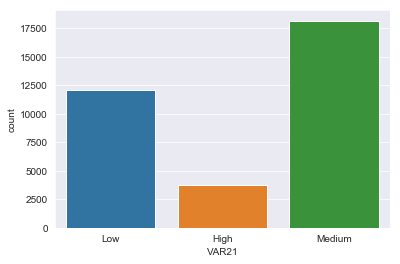

In [900]:
sns.countplot(train.VAR21)

### 1)Fill missing values
### 2)Remove outliers
### 3)fit dec tree and naive bayes
### 4)feature selection using statsmodel,chi2 ,feat import,corr
### 5) apply pca
### 6) smote

In [7]:
sns.set_style('darkgrid')
#plt.hist(train.VAR16,bins=40)

In [8]:
train['VAR2'].fillna(train.VAR2.median(),inplace=True)

In [9]:
train['VAR5'].fillna(train.VAR5.median(),inplace=True)

In [10]:
train.VAR7.fillna(0.55971,inplace=True)

In [11]:
train['VAR8'].fillna(train.VAR8.mode()[0],inplace=True)

In [12]:
train.VAR16.fillna(train.VAR16.mode()[0],inplace=True)

In [13]:
# many missing
train.VAR17.fillna(1000,inplace=True)

In [14]:
train.VAR3.fillna(0.1666,inplace=True)

In [15]:
#keeping rows with 4 or less missing features
train=train.dropna(thresh=16)

In [16]:
train.VAR6.fillna(train.VAR6.median(),inplace=True)

In [17]:
train.VAR10.fillna(train.VAR10.median(),inplace=True)

In [18]:
train.VAR11.median()

2.096280609

In [19]:
train.VAR11.fillna(train.VAR11.median(),inplace=True)

In [20]:
train.VAR13.fillna(train.VAR13.median(),inplace=True)

In [21]:
#many missing
train.VAR9.fillna(train.VAR9.median(),inplace=True)

In [22]:
train.VAR15.fillna(train.VAR15.median(),inplace=True)

In [23]:
train.VAR12.fillna(train.VAR12.median(),inplace=True)

In [24]:
#many missing
train.VAR4.fillna(train.VAR4.median(),inplace=True)

In [25]:
#many missing and change risk value
train.VAR4.fillna((train.VAR4.median()+train.VAR4.mean())/2,inplace=True)

In [26]:
#remove '.'from VAR14
train.VAR14=train.VAR14.apply(lambda x :int(1) if x=='.' else int(x) )

In [27]:
#function to impute label
def impute(a):
    flag=5
    if a=='Low':
        flag=0
    elif a=='Medium':
        flag=1
    else:
        flag=2
    return flag
        

In [28]:
train.VAR21=train.VAR21.apply(impute)

# feat engineering

In [238]:
train['var7/var8']=train.VAR7/train.VAR8
train['var7/var5']=train.VAR7/train.VAR5
train['var8*var14']=train.VAR8*train.VAR14

# no improvement
#train['var3-var6']=abs(train.VAR3 - train.VAR6)
#train['var2-var4']=abs(train.VAR2 - train.VAR4)
#train['var4*var11']=train.VAR4 * train.VAR11

#train['var2*var6*12*20*13']=train.VAR2 * train.VAR6*train.VAR12*train.VAR20*train.VAR13
#train['var4*var11*7']=train.VAR4 * train.VAR11 * train.VAR7

#train.drop(['var2*var6*12*20*13','var4*var11*7'],1,inplace=True)

#train.drop(['var3-var6','var2-var4','var4*var6'],1,inplace=True)

train['var7/var8']=train['var7/var8'].apply(lambda x: x if x!=np.inf else 0)
train['var7/var5']=train['var7/var5'].apply(lambda x: x if x!=np.inf else 0)
#train.drop('var8/var14',1,inplace=True)

In [239]:
train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,var7/var8,var7/var5,var8*var14
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,22.086661,58.632548,...,1.0,1.540594,1000.0,1,0,100.104991,0,0.005459,0.001728,198.113469
1,2,911.764706,0.027778,142.857143,611.574748,8.181818,1.344479,198.600020,22.086661,58.632548,...,10.0,1.614613,1000.0,0,1,146.654045,2,0.006770,0.002198,198.600020
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,22.086661,58.632548,...,10.0,1.044599,1000.0,0,0,98.249570,1,0.003654,0.001170,197.267767
3,4,892.941177,0.166600,142.857143,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,10.0,1.145729,1000.0,1,0,140.862306,0,0.004156,0.001285,197.355744
4,5,914.117647,0.083333,142.857143,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,10.0,1.558341,1000.0,1,0,101.268503,2,0.006906,0.002191,198.790477


# Analysis

C:\Users\srinivas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


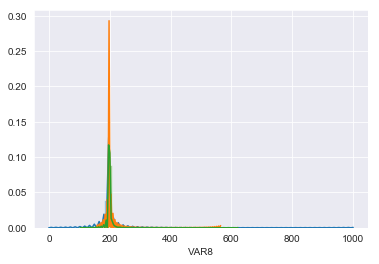

In [29]:
sns.distplot(train[train.VAR21==0].VAR8)
sns.distplot(train[train.VAR21==1].VAR8)
sns.distplot(train[train.VAR21==2].VAR8)

In [765]:
train.shape

(32860, 24)

In [ ]:
sns.boxplot(train.VAR21,train.VAR2)

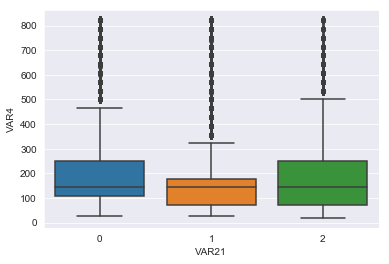

In [782]:
sns.boxplot(train.VAR21,train.VAR4)

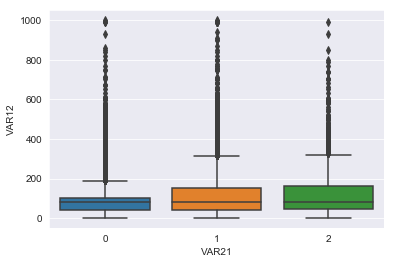

In [881]:
sns.boxplot(train.VAR21,train.VAR12)

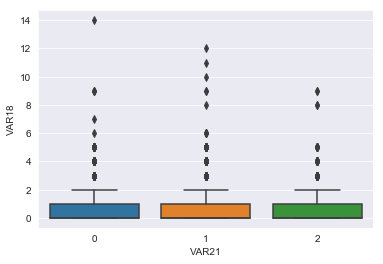

In [882]:
sns.boxplot(train.VAR21,train.VAR18)

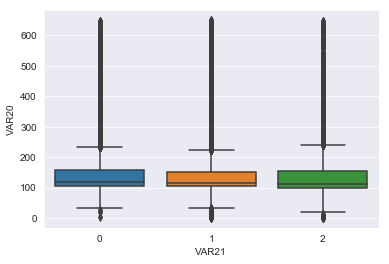

In [802]:
sns.boxplot(train.VAR21,train.VAR20)

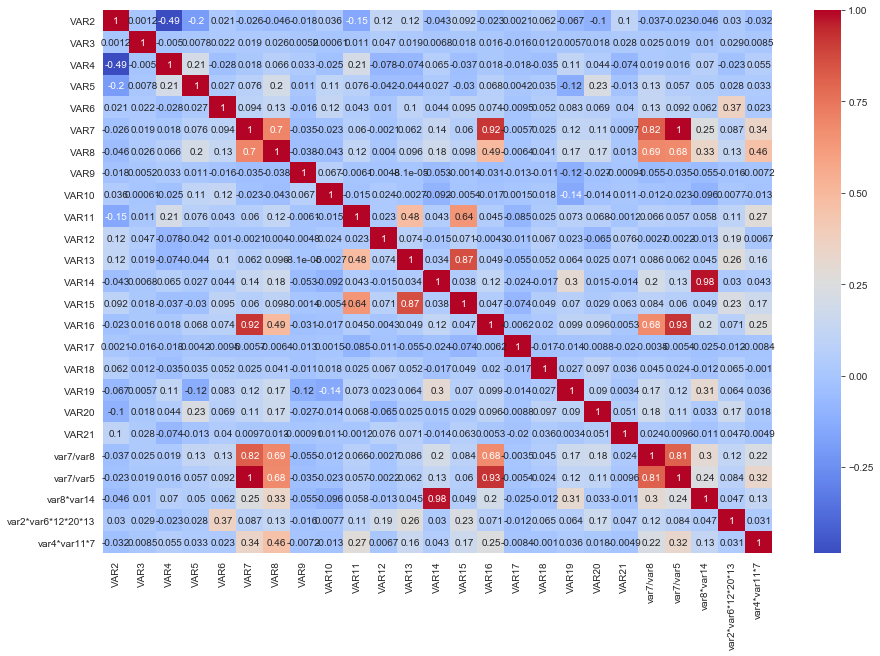

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(train.drop('VAR1',1).corr(),cmap='coolwarm',annot=True)

In [803]:
# scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [804]:
scale=StandardScaler()

In [805]:
X=train.drop(['VAR1','VAR21'],1)
scaled_X=scale.fit_transform(X)

C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [806]:
scaled_X.shape

(30984, 22)

In [807]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [808]:
pca=PCA(2)

In [809]:
x_pca=pca.fit_transform(scaled_X)

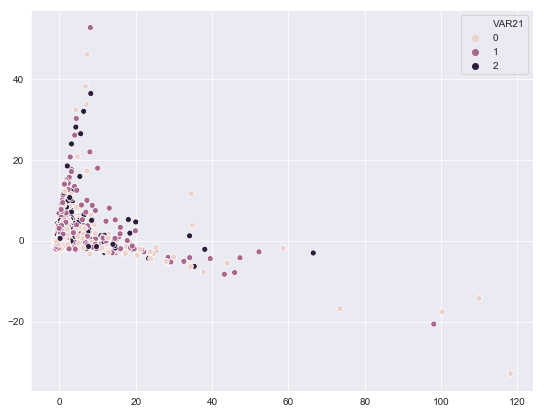

In [810]:
plt.figure(figsize=(9,7))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=train.VAR21)

In [811]:
lda=LinearDiscriminantAnalysis(n_components=2)

In [814]:
x_lda=lda.fit_transform(X,y)

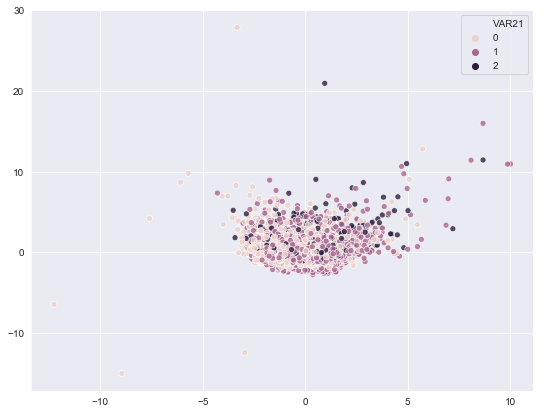

In [815]:
plt.figure(figsize=(9,7))
sns.scatterplot(x_lda[:,0],x_lda[:,1],hue=train.VAR21,alpha=.8)

# Scoring  fn

In [31]:
#defining error func

def error_fn(y_test,pred):
    score=[]
    y_test=list(y_test)
    pred=list(pred)
    
    for i in range(len(y_test)):
    
        if y_test[i]==0:
            if pred[i]==0:
                score.append(1000)
            elif pred[i]==1:
                score.append(-100)
            elif pred[i]==2:
                score.append(-200)
        if y_test[i]==1:
            if pred[i]==1:
                score.append(1000)
            elif pred[i]==0:
                score.append(-50)
            elif pred[i]==2:
                score.append(-100)
        if y_test[i]==2:
            if pred[i]==2:
                score.append(1000)
            elif pred[i]==0:
                score.append(-100)
            elif pred[i]==1:
                score.append(-50)

    return sum(score)

In [32]:
#important_feat=['VAR4','VAR12','VAR20','var8*var14','VAR3','VAR6','VAR2','VAR13','VAR15','VAR7','VAR11','VAR16','VAR17','VAR5','VAR9','VAR19','VAR18']

# train test split

In [249]:
#train test split
from sklearn.model_selection import train_test_split

X=train.drop(['VAR1','VAR21'],1)
y=train.VAR21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# feature selection

### using chi2 

In [250]:
from sklearn.feature_selection import SelectKBest,chi2

In [251]:
best_feat=SelectKBest(score_func=chi2,k=15)

In [252]:
best_feat=best_feat.fit(X,y)

In [253]:
feat_significance=pd.DataFrame(best_feat.scores_)
col_name=pd.DataFrame(X.columns)

In [254]:
feat_significance=pd.concat([feat_significance,col_name],1)

In [255]:
feat_significance.columns=['significance','var']

In [256]:
feat_significance.sort_values(ascending=False,by='significance')

,significance,var
2,62800.995122,VAR4
10,21723.795633,VAR12
18,10451.254299,VAR20
21,7668.068495,var8*var14
1,3850.825020,VAR3
4,2657.974755,VAR6
0,1712.758522,VAR2
11,1402.408971,VAR13
13,1272.901172,VAR15
5,1226.803011,VAR7


In [259]:
important_feat=list(feat_significance.sort_values(ascending=False,by='significance')['var'][:17])

In [260]:
train[important_feat].head()

,VAR4,VAR12,VAR20,var8*var14,VAR3,VAR6,VAR2,VAR13,VAR15,VAR7,VAR11,VAR16,VAR17,VAR5,VAR9,VAR19,VAR18
0,321.428571,100.083403,100.104991,198.113469,0.138889,1.818182,828.235294,1.0,1.0,1.081550,0.279273,1.540594,1000.0,625.911006,22.086661,0,1
1,142.857143,15.012510,146.654045,198.600020,0.027778,8.181818,911.764706,10.0,10.0,1.344479,2.096281,1.614613,1000.0,611.574748,22.086661,1,0
2,35.714286,210.175146,98.249570,197.267767,0.833333,8.181818,962.352941,10.0,10.0,0.720796,0.453212,1.044599,1000.0,615.825381,22.086661,0,0
3,142.857143,80.066722,140.862306,197.355744,0.166600,9.090909,892.941177,10.0,10.0,0.820218,2.096281,1.145729,1000.0,638.076431,4.363431,0,1
4,142.857143,210.175146,101.268503,198.790477,0.083333,5.181818,914.117647,10.0,10.0,1.372928,2.096281,1.558341,1000.0,626.514988,85.938202,0,1


In [206]:
#important_feat=['VAR4','VAR12','VAR20','var8*var14','VAR3','VAR6','VAR2','VAR13','VAR15','VAR7','VAR11','VAR17','VAR5','VAR9','VAR19','VAR18']

# Recursive feat elimination(stats)

In [117]:
from sklearn.feature_selection import RFE

In [118]:
rfe = RFE(rfc, 10)

In [120]:
rfe = rfe.fit(X,y)

In [436]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True  True False False  True False False
 False False  True False False False  True False  True  True]
[ 1  2  7  1  1  1  1  8 10  1  6  3 12  5  1  9 11 13  1  4  1  1]


In [517]:
#list(zip(X.columns,rfe.support_))

In [518]:
#list(zip(X.columns,rfe.ranking_))

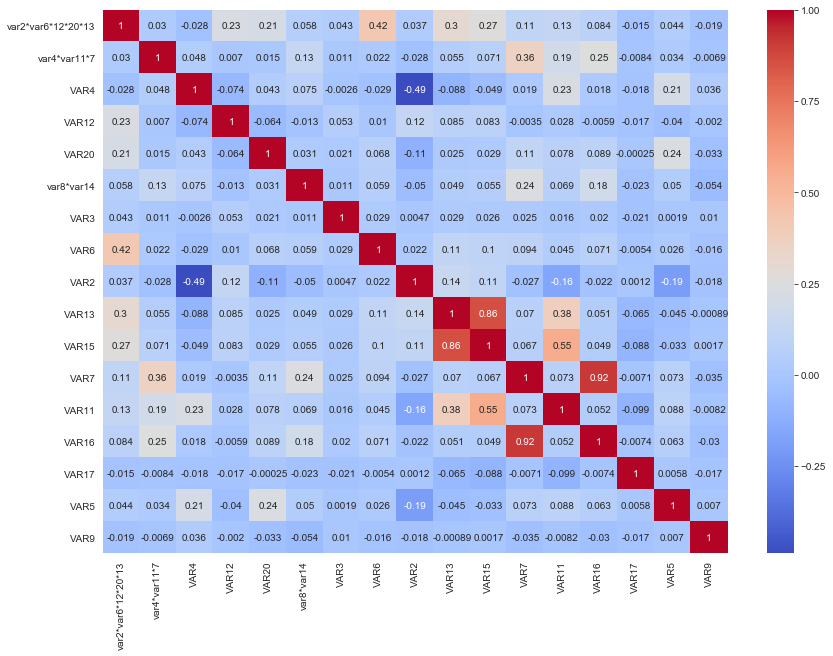

In [182]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train[important_feat].corr(),cmap='coolwarm',annot=True)

# models

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [208]:
clf=GaussianNB()

In [209]:
clf.fit(X_train[important_feat],y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [210]:
pred=clf.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2947
           1       0.53      0.99      0.69      4346
           2       0.30      0.03      0.05       922

   micro avg       0.53      0.53      0.53      8215
   macro avg       0.28      0.34      0.25      8215
weighted avg       0.31      0.53      0.37      8215

[[   0 2923   24]
 [   1 4312   33]
 [   0  898   24]]
0.2463124822716454
0.5278149726110773 

score : 3990650


# RF

In [211]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [212]:
# works better with outh scaling
#rfc=RandomForestClassifier(n_estimators=120,random_state=70,criterion='entropy',max_depth=10)
rfc=RandomForestClassifier(n_estimators=520,random_state=57,max_depth=10)

In [213]:
rfc.fit(X_train[important_feat],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=520, n_jobs=None,
            oob_score=False, random_state=57, verbose=0, warm_start=False)

In [214]:
pred=rfc.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40      2947
           1       0.57      0.88      0.69      4346
           2       0.65      0.03      0.05       922

   micro avg       0.57      0.57      0.57      8215
   macro avg       0.60      0.40      0.38      8215
weighted avg       0.59      0.57      0.51      8215

[[ 881 2059    7]
 [ 522 3818    6]
 [ 102  796   24]]
0.3796047202663892
0.5749239196591601 

score : 4439000


In [57]:
from sklearn.model_selection import cross_val_score

In [287]:
val=cross_val_score(estimator=RandomForestClassifier(200),X=X_train,y=y_train,cv=4,scoring=custom_scorer)

In [288]:
val

array([3349050, 3254950, 3306100, 3352150])

# Catboost

In [78]:
from catboost import CatBoostClassifier

In [79]:
cat=CatBoostClassifier(n_estimators=200)

In [1]:
cat.fit(X_train[important_feat],y_train)

In [81]:
pred=cat.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
print('train score :',error_fn(y_train,cat.predict(X_train)))

C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\srinivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.59      0.25      0.35      2947
           1       0.56      0.90      0.69      4346
           2       0.00      0.00      0.00       922

   micro avg       0.57      0.57      0.57      8215
   macro avg       0.38      0.38      0.35      8215
weighted avg       0.51      0.57      0.49      8215

[[ 741 2206    0]
 [ 436 3910    0]
 [  82  840    0]]
0.34808890535913967
0.5661594643944005 

score : 4358400
train score : 14241750


# lightgbm (score-5383350)

In [261]:
from lightgbm import LGBMClassifier

In [262]:
#lgbm=LGBMClassifier(colsample_bytree=0.8,num_leaves=30,max_depth=5,n_estimators=100,reg_alpha=5,
#                            reg_lambda=30,min_child_samples=20,subsample=.6)

lgbm=LGBMClassifier(colsample_bytree=0.8,num_leaves=30,max_depth=5,n_estimators=100,reg_alpha=5,
                            reg_lambda=30,min_child_samples=20,subsample=.6)

#reg_alpha=1.5,reg_lambda=3

In [263]:
#feat=['VAR16', 'VAR6', 'VAR5', 'VAR2', 'VAR7', 'VAR9', 'VAR3', 'var8*var14', 'VAR12', 'VAR15', 'VAR13', 'VAR20', 'VAR18', 'VAR11', 'VAR19', 'VAR4']
lgbm.fit(X_train[important_feat],y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
        random_state=None, reg_alpha=5, reg_lambda=30, silent=True,
        subsample=0.6, subsample_for_bin=200000, subsample_freq=0)

In [264]:
pred=lgbm.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
#print('train score :',error_fn(y_train,lgbm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.57      0.35      0.43      2947
           1       0.58      0.85      0.69      4346
           2       0.59      0.04      0.08       922

   micro avg       0.58      0.58      0.58      8215
   macro avg       0.58      0.41      0.40      8215
weighted avg       0.58      0.58      0.53      8215

[[1021 1919    7]
 [ 639 3686   21]
 [ 127  754   41]]
0.4009141877677644
0.5779671332927572 

score : 4470250


In [302]:
#joblib.dump(lgbm,'lgbm.pkl')
#joblib.load(lgbm.pkl)

['lgbm.pkl']

# GBM

In [521]:
#Bagging lgbm
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [682]:
gbm=GradientBoostingClassifier(n_estimators=200)

In [685]:
gbm.fit(X_train[important_feat],y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [686]:
pred=gbm.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
#print('train score :',error_fn(y_train,gbm.predict(X_train[important_feat])))

              precision    recall  f1-score   support

           0       0.57      0.34      0.43      2947
           1       0.58      0.84      0.69      4346
           2       0.49      0.07      0.12       922

   micro avg       0.58      0.58      0.58      8215
   macro avg       0.55      0.42      0.41      8215
weighted avg       0.57      0.58      0.53      8215

[[1013 1915   19]
 [ 643 3655   48]
 [ 128  729   65]]
0.4127621018930591
0.5761412051125989 

score : 4451500


# XGboost

In [120]:
from xgboost import XGBClassifier

In [121]:
#XGBClassifier(n_estimators=150,scale_pos_weight=1,gamma=0.6,colsample_bytree=.9,subsample=.5,
  #                                       min_child_weight=1,max_depth=5,learning_rate=0.05)

xgb=XGBClassifier(n_estimators=150,scale_pos_weight=1,gamma=0.6,colsample_bytree=.9,subsample=.5,
                                         min_child_weight=1,max_depth=5,learning_rate=0.05)

In [122]:
xgb.fit(X_train[important_feat],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.6, learning_rate=0.05,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [124]:
pred=xgb.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
#print('train score :',error_fn(y_train,xgb.predict(X_train[important_feat])))

              precision    recall  f1-score   support

           0       0.58      0.34      0.43      2947
           1       0.58      0.85      0.69      4346
           2       0.50      0.05      0.10       922

   micro avg       0.58      0.58      0.58      8215
   macro avg       0.55      0.41      0.40      8215
weighted avg       0.57      0.58      0.53      8215

[[ 994 1937   16]
 [ 601 3712   33]
 [ 129  744   49]]
0.40433175571558344
0.5788192331101644 

score : 4474650


# Gridsearch

In [542]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer

In [543]:
custom_scorer = make_scorer(error_fn, greater_is_better=True)

In [578]:
param={
 #  'min_samples_split':[15,10,18],
 # 'min_samples_leaf': [35,40,60,70],
 # 'n_estimators':[150,200,300],
 # 'max_depth':[5,8],
 # 'max_features':['sqrt','log2'], 
 # 'subsample':[.8,.9,1],
 # 'learning_rate':[.1,.15,.05],
 # 
    
}

In [579]:
grid=GridSearchCV(estimator=GradientBoostingClassifier(min_samples_leaf=40,max_depth=5,min_samples_split=15,
                                                      ),param_grid=param,cv=4,scoring=custom_scorer)

In [2]:
grid.fit(X_train,y_train)

In [571]:
#{'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 7, 'min_child_weight': 7}
grid.best_params_

{'max_depth': 5, 'min_samples_split': 15}

In [572]:
pred=grid.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
print('train score :',error_fn(y_train,grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.55      0.35      0.43      2947
           1       0.58      0.83      0.68      4346
           2       0.51      0.07      0.12       922

   micro avg       0.57      0.57      0.57      8215
   macro avg       0.55      0.42      0.41      8215
weighted avg       0.56      0.57      0.53      8215

[[1036 1894   17]
 [ 694 3609   43]
 [ 139  720   63]]
0.41124913212652087
0.5730979914790019 

score : 4426300
train score : 15046300


# vote of lgbm and rfc

In [219]:
from sklearn.ensemble import VotingClassifier

In [220]:
vote=VotingClassifier([('rfc',rfc),('lgbm',lgbm)],voting='soft')

In [221]:
vote.fit(X[important_feat],y)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_wei...=5, reg_lambda=30, silent=True,
        subsample=0.6, subsample_for_bin=200000, subsample_freq=0))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [222]:
pred=vote.predict(X_test[important_feat])

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))
#print('train score :',error_fn(y_train,vote.predict(X_train[important_feat])))

              precision    recall  f1-score   support

           0       0.65      0.37      0.47      2947
           1       0.60      0.89      0.72      4346
           2       0.92      0.07      0.14       922

   micro avg       0.61      0.61      0.61      8215
   macro avg       0.72      0.45      0.44      8215
weighted avg       0.65      0.61      0.57      8215

[[1102 1842    3]
 [ 475 3868    3]
 [ 117  736   69]]
0.4433800588572409
0.6133901399878271 

score : 4781650


In [508]:
#joblib.dump(vote,'vote.pkl')

['vote.pkl']

In [265]:
loaded_vote=joblib.load('vote.pkl')

# stacking

In [159]:
from mlxtend.classifier import StackingCVClassifier

In [160]:
sclf=StackingCVClassifier(classifiers=[lgbm,vote,rfc],meta_classifier=lgbm,cv=4)

In [161]:
sclf.fit(X[important_feat].values,y.values)

StackingCVClassifier(classifiers=[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
  ...mators=520, n_jobs=None,
            oob_score=False, random_state=57, verbose=0, warm_start=False)],
           cv=4,
           meta_classifier=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
        random_state=None, reg_alpha=5, reg_lambda=30, silent=True,
        subsample=0.6, subsample_for_bin=200000, subsample_freq=0),
           shuffle=True, store_train_meta_features=False, stratify=True,
           use_clones=True, use_feat

In [162]:
pred=sclf.predict(X_test[important_feat].values)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.38      0.49      2947
           1       0.60      0.89      0.72      4346
           2       0.92      0.07      0.12       922

   micro avg       0.62      0.62      0.62      8215
   macro avg       0.73      0.45      0.44      8215
weighted avg       0.66      0.62      0.57      8215

[[1126 1818    3]
 [ 455 3889    2]
 [ 114  748   60]]
0.44227825734042175
0.6177723676202069 

score : 4820850


# function to change threshold

In [104]:
def change_thresh(data):
    
    predictions=[]
    for i in range(data.shape[0]):
        a=[]
        for j in [0,1,2]:
            if j==0:
                a.append(round(data[i][j]*1.1,2))
            elif j==2:
                a.append(round(data[i][j]*1.2,2))
            else:
                a.append(data[i][j]*1)
        predictions.append(a)
        
    return np.array(predictions)

In [105]:
def prob_to_label(data):
    label=[]
    for i in range(data.shape[0]):
        a=list(data[i])
        max_pos=a.index(max(a))
        
        if max_pos==0:
            label.append(0)
        elif max_pos==1:
            label.append(1)
        else :
            label.append(2)
    return label

In [370]:
pd.DataFrame(prob_to_label(change_thresh(vote.predict_proba(X_test[important_feat]))))[0].value_counts()

1    5419
0    2584
2     212
Name: 0, dtype: int64

In [536]:
#pd.DataFrame(vote.predict_proba(X_test)[1:3])

# taking avg of prob

In [90]:
cat=joblib.load('cat.pkl')

In [95]:
def avg_prob_fn(X_test):
    cat_prob=cat.predict_proba(X_test)
    lgbm_prob=lgbm.predict_proba(X_test[important_feat])
    rfc_prob=rfc.predict_proba(X_test[important_feat])
    
    cat_prob=pd.DataFrame(cat_prob,columns=['cat_0','cat_1','cat_2'])
    lgbm_prob=pd.DataFrame(lgbm_prob,columns=['lg_0','lg_1','lg_2'])
    rfc_prob=pd.DataFrame(rfc_prob,columns=['rf_0','rf_1','rf_2'])
    
    avg=(cat_prob.cat_0 + lgbm_prob.lg_0 + rfc_prob.rf_0)/3
    avg_prob=pd.DataFrame(avg,columns=['0'])
    avg_prob['1']=(cat_prob.cat_1 + lgbm_prob.lg_1 + rfc_prob.rf_1)/3
    avg_prob['2']=(cat_prob.cat_2 + lgbm_prob.lg_2 + rfc_prob.rf_2)/3
    
    return prob_to_label(np.array(avg_prob))

In [92]:

cat_prob=cat.predict_proba(X_test)
lgbm_prob=lgbm.predict_proba(X_test[important_feat])
rfc_prob=rfc.predict_proba(X_test[important_feat])

In [93]:
cat_prob=pd.DataFrame(cat_prob,columns=['cat_0','cat_1','cat_2'])
lgbm_prob=pd.DataFrame(lgbm_prob,columns=['lg_0','lg_1','lg_2'])
rfc_prob=pd.DataFrame(rfc_prob,columns=['rf_0','rf_1','rf_2'])

In [94]:
avg=(cat_prob.cat_0 + lgbm_prob.lg_0 + rfc_prob.rf_0)/3
avg_prob=pd.DataFrame(avg,columns=['0'])

In [533]:
avg_prob['1']=(cat_prob.cat_1 + lgbm_prob.lg_1 + rfc_prob.rf_1)/3
avg_prob['2']=(cat_prob.cat_2 + lgbm_prob.lg_2 + rfc_prob.rf_2)/3

In [539]:
pred=prob_to_label(np.array(avg_prob))

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred,average='macro'))
print(accuracy_score(y_test,pred),'\n')
print('score :',error_fn(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.37      0.46      2947
           1       0.59      0.88      0.71      4346
           2       0.86      0.07      0.12       922

   micro avg       0.60      0.60      0.60      8215
   macro avg       0.69      0.44      0.43      8215
weighted avg       0.64      0.60      0.56      8215

[[1079 1864    4]
 [ 517 3823    6]
 [ 117  745   60]]
0.43115530804434865
0.6040170419963481 

score : 4699400


# leaderboard predictions

In [282]:
leaderboard=pd.read_csv(file + 'leaderboard.csv')

In [283]:
# feature eng
leaderboard['var7/var8']=leaderboard.VAR7/train.VAR8
leaderboard['var7/var5']=leaderboard.VAR7/train.VAR5
leaderboard['var8*var14']=leaderboard.VAR8*train.VAR14

#leaderboard['var3-var6']=abs(leaderboard.VAR3 - leaderboard.VAR6)
#leaderboard['var2-var4']=abs(leaderboard.VAR2 - leaderboard.VAR4)
#leaderboard['var4*var6']=leaderboard.VAR4 * leaderboard.VAR11

#leaderboard['var2*var6*12*20*13']=leaderboard.VAR2 * leaderboard.VAR6 * leaderboard.VAR12 * leaderboard.VAR20*leaderboard.VAR13
#leaderboard['var4*var11*7']=leaderboard.VAR4 * leaderboard.VAR11*leaderboard.VAR7

#leaderboard.drop(['var2*var6*12*20*13','var4*var11*7'],1,inplace=True)

leaderboard['var7/var8']=leaderboard['var7/var8'].apply(lambda x: x if x!=np.inf else 0)
leaderboard['var7/var5']=leaderboard['var7/var5'].apply(lambda x: x if x!=np.inf else 0)
#train.drop('var8/var14',1,inplace=True)

In [284]:
#For leaderboard data
leaderboard.fillna(train.median(),inplace=True)

In [285]:
#remove '.'from VAR14
leaderboard.VAR14=leaderboard.VAR14.apply(lambda x :int(1) if x=='.' else int(x) )

In [286]:
leaderboard.isna().sum()

VAR1          0
VAR2          0
VAR3          0
VAR4          0
VAR5          0
VAR6          0
VAR7          0
VAR8          0
VAR9          0
VAR10         0
VAR11         0
VAR12         0
VAR13         0
VAR14         0
VAR15         0
VAR16         0
VAR17         0
VAR18         0
VAR19         0
VAR20         0
var7/var8     0
var7/var5     0
var8*var14    0
dtype: int64

In [287]:
leaderboard.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,var7/var8,var7/var5,var8*var14
0,1,984.705882,0.005556,35.714286,611.574748,3.454545,0.559710,196.911295,22.086661,47.899686,...,1,6.666667,0.959315,1000.0,0,1,99.032702,0.002825,0.000894,196.911295
1,2,815.294118,0.333333,392.857143,638.878239,9.090909,1.738398,199.830468,22.086661,58.632548,...,1,10.000000,1.949250,1000.0,1,0,82.507745,0.008753,0.002842,199.830468
2,3,872.941177,0.138889,714.285714,611.574748,8.181818,0.746660,197.352191,22.086661,58.632548,...,1,6.733333,1.122608,1000.0,0,1,0.000000,0.003785,0.001212,197.352191
3,4,942.352941,1.051189,142.857143,651.420058,72.727273,100.909504,344.554996,22.086661,48.976192,...,5,13.333333,63.597146,1000.0,0,1,400.672978,0.511308,0.158146,344.554996
4,5,983.529412,4.444444,142.857143,611.606260,13.636364,0.562581,196.915589,57.738459,58.632548,...,3,23.333333,0.961071,1000.0,0,0,99.685026,0.002830,0.000898,196.915589


In [288]:
final_leaderboard=leaderboard.drop(['VAR1'],1)[important_feat]

In [289]:
final_leaderboard.shape

(10000, 17)

In [290]:
X.shape

(32860, 22)

In [291]:
#sns.countplot(cat.predict(final_leaderboard))

leaderboard['VAR21']=loaded_vote.predict(final_leaderboard.values)

In [ ]:
avg

In [106]:
#changing threshhold
#leaderboard['VAR21']=prob_to_label(change_thresh(loaded_vote.predict_proba(final_leaderboard)))
leaderboard['VAR21']=avg_prob_fn(final_leaderboard)

In [292]:
submission=leaderboard[['VAR1','VAR21']]
leaderboard.drop('VAR21',1,inplace=True)

In [293]:
# convert back to original label
def int_to_label(x):
    if x==0:
        return 'Low'
    elif x==1:
        return 'Medium'
    else:
        return 'High'
    
submission.VAR21=submission.VAR21.apply(int_to_label)

C:\Users\srinivas\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [294]:
submission.VAR21.value_counts()

Medium    7931
Low       2014
High        55
Name: VAR21, dtype: int64

In [295]:
submission.to_csv('Vishleshaks_IITKharagpur.csv',index=False,header=False)